<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/main/ImagesToVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating video from the images data

In [ ]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=796272d3ddbb9538047d205c1b24613447d6589717688f7d3327f166efc0083b
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/7e42205c427015e223944d47ea89e01dc779fb49ba664fb743
Successfully built gif2numpy


In [ ]:
import cv2
import glob
import gif2numpy
import numpy as np
from google.colab.patches import cv2_imshow

Code for a day

In [ ]:
# List all the .gif files in the directory
files = glob.glob('aemet_pm_20220105*.gif')
files.sort()  # Sort the files in order

# Convert the first .gif file to get the frame size
frames, extensions, image_specs = gif2numpy.convert(files[0])
height, width, layers = frames[0].shape

# Define the video writer object
video = cv2.VideoWriter("2022PalmaJanuary1.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

# Loop through all the files and add them to the video
for file in files:
    frames, extensions, image_specs = gif2numpy.convert(file)
    for frame in frames:
        video.write(frame)

# Release the video writer object
video.release()

Code for a week

In [ ]:
# List all the .gif files in the directory for a week
files = glob.glob('aemet_pm_20220101*.gif') + glob.glob('aemet_pm_20220102*.gif') + \
        glob.glob('aemet_pm_20220103*.gif') + glob.glob('aemet_pm_20220104*.gif') + \
        glob.glob('aemet_pm_20220105*.gif') + glob.glob('aemet_pm_20220106*.gif') + \
        glob.glob('aemet_pm_20220107*.gif')
files.sort()  # Sort the files in order

# Convert the first .gif file to get the frame size
frames, extensions, image_specs = gif2numpy.convert(files[0])
height, width, layers = frames[0].shape

# Define the video writer object
video = cv2.VideoWriter("video_20220101_20220107.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 100, (width, height))

# Loop through all the files and add them to the video
for file in files:
    frames, extensions, image_specs = gif2numpy.convert(file)
    for frame in frames:
        video.write(frame)

# Release the video writer object
video.release()


Create overlap image

In [39]:
# List all the .gif files in the directory
files = glob.glob('aemet_pm_20220105*.gif')
files.sort()  # Sort the files in order

# Convert the first .gif file to get the frame size
frames, extensions, image_specs = gif2numpy.convert(files[0])
height, width, layers = frames[0].shape

# Create an empty image with the same size as the frames
final_image = np.zeros((height, width, layers), dtype=np.uint8)

# Loop through all the files and add them to the final image
for file in files:
    frames, extensions, image_specs = gif2numpy.convert(file)
    for frame in frames:
        final_image = cv2.addWeighted(final_image, 0.5, frame, 0.5, 0)

# Save the final image
cv2.imwrite("2022PalmaJanuary5.png", final_image)


True

Show image

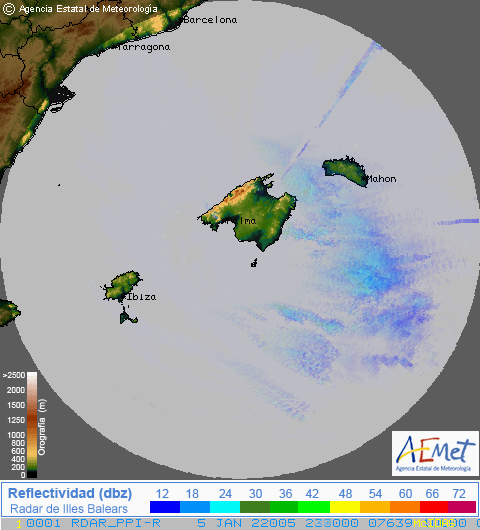

In [41]:
cv2_imshow(final_image)

Color thresholding

In [44]:
# Define the color threshold
lower_blue = np.array([94,58,96])
upper_blue = np.array([130,255,255])

# List all the .gif files in the directory
files = glob.glob('aemet_pm_20220105*.gif')
files.sort()  # Sort the files in order

# Convert the first .gif file to get the frame size
frames, extensions, image_specs = gif2numpy.convert(files[0])
height, width, layers = frames[0].shape

# Create an empty image with the same size as the frames
final_image = np.zeros((height, width, layers), dtype=np.uint8)

# Loop through all the files and add them to the final image
for file in files:
    frames, extensions, image_specs = gif2numpy.convert(file)
    for frame in frames:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        res = cv2.bitwise_and(frame, frame, mask=mask)
        final_image = cv2.addWeighted(final_image, 0.5, res, 0.5, 0)

# Save the final image
cv2.imwrite("2022PalmaJanuary5.png", final_image)

True

Show image

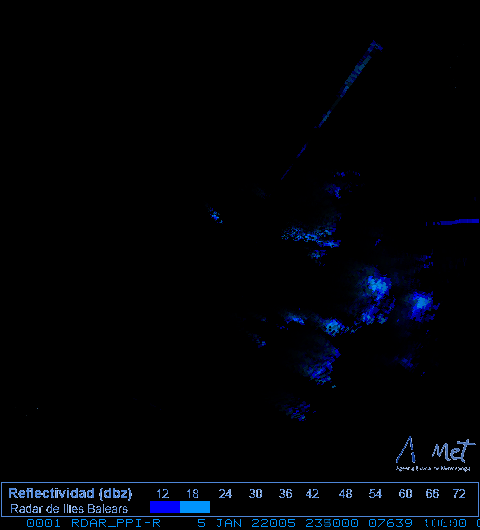

In [45]:
cv2_imshow(final_image)

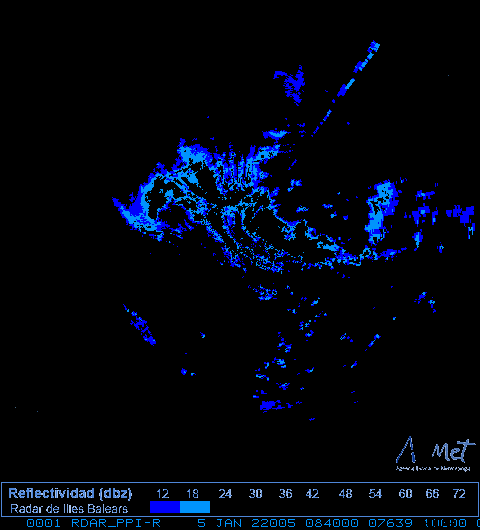

In [52]:
import numpy as np
import cv2
from gif2numpy import convert

# Convert the .gif image to a numpy array
frames, extensions, image_specs = convert("aemet_pm_202201050840.gif")

# Define the color threshold
lower_blue = np.array([94,58,96])
upper_blue = np.array([130,255,255])

for frame in frames:
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the image to get only the blue pixels
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND the original image with the mask to get the output
    output = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the output image
    cv2_imshow(output)



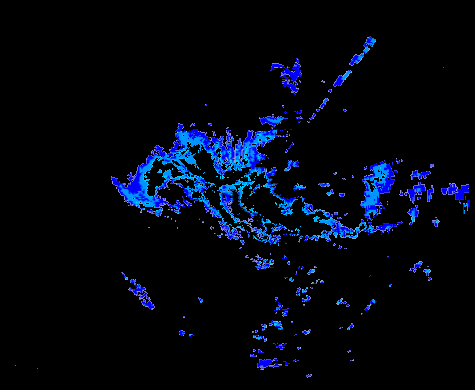

In [55]:
import numpy as np
import cv2
from gif2numpy import convert

# Convert the .gif image to a numpy array
frames, extensions, image_specs = convert("aemet_pm_202201050840.gif")

# Define the color threshold
lower_blue = np.array([94,58,96])
upper_blue = np.array([130,255,255])

for frame in frames:
    # Resize the image to 475x475
    frame = cv2.resize(frame, (475, 475))

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the image to get only the blue pixels
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND the original image with the mask to get the output
    output = cv2.bitwise_and(frame, frame, mask=mask)

    # Eliminate the pixels above the desired height
    height, width, _ = output.shape
    output = output[:height-85, :, :]

    # Display the output image
    cv2_imshow(output)
